# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from scipy.fft import dctn, idctn

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

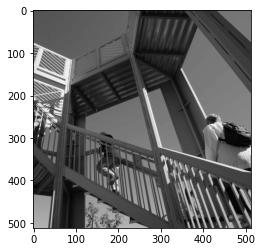

In [2]:
X = misc.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata DCT a unei imagini

Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}
              \sum_{n_2=0}^{N_2-1}
              x_{n_1,n_2}
              \cos\left[\frac{\pi}{N_1}m_1
                \left(n_1 + \frac12\right)\right]
              \cos\left[\frac{\pi}{N_2}m_2\left(n_2 + \frac12\right)\right]
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric și par
* proprietățile transformatei DCT-II sunt respectate și în cazul celei 2D

În Python avem rutina `scipy.fft.dct` pentru 1D și `scipy.fft.dctn` pentru generalizarea la semnale $n$-dimensionale. Dimensiunea este determinată automat după forma semnalului; tipul DCT poate fi specificat prin atributul `type` (implicit II).

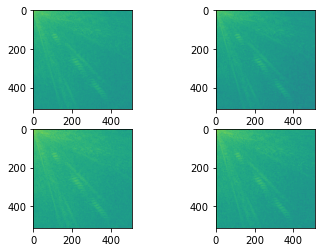

In [3]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20*np.log10(abs(Y1))
freq_db_2 = 20*np.log10(abs(Y2))
freq_db_3 = 20*np.log10(abs(Y3))
freq_db_4 = 20*np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()

# Compactarea energiei. Compresie.

Putem profita de proprietatea compresiei energiei prin anularea frecvențelor DCT începând cu *bin*-ul `k` după care aplicăm transformata DCT inversă (similar cu tema anterioară):

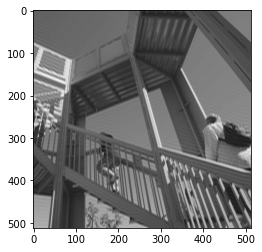

In [4]:
k = 120

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# JPEG

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB în Y'CbCr
2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
3. cuantizarea în frecvență cu $Q$ dat de standardul JPEG
4. opțional compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare $Q$ este:
$$
Q =
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 & \\
12 & 12 & 14 & 19 & 26 & 28 & 60 & 55 & \\
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 & \\
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 & \\
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 & \\
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 & \\
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101\\
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99\\
\end{bmatrix}
$$

Imaginea noastră de test este monocromă, deci nu necesită pasul 1, dar putem efectua o operație de *down-sampling* în preprocesare precum am prezentat la curs.

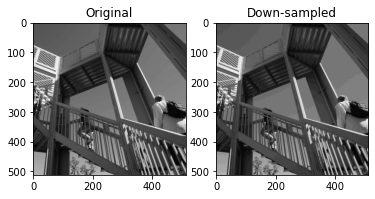

In [5]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down*np.round(X_jpeg/Q_down);

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('Down-sampled')
plt.show()

Pentru fiecare bloc de $8\times 8$ aplică DCT și cuantizare.

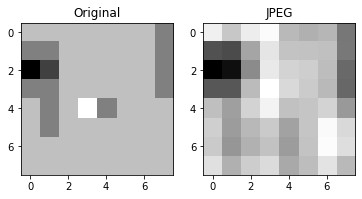

Componente în frecvență:64
Componente în frecvență după cuantizare: 14


In [6]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg*np.round(y/Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

# Sarcini

1. [6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

2. [4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr). Exemplificați pe `scipy.misc.face` folosită în tema anterioară.

3. [6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

4. [4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

In [7]:
# Exercitiul 1

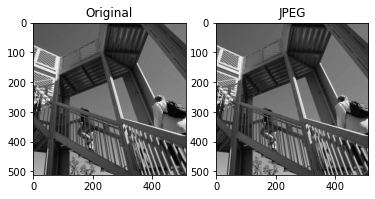

Componente în frecvență:250424
Componente în frecvență după cuantizare: 125064


In [8]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

block_size = 8

def block_idct(y, shape):
    return np.array([idctn(y[i:i+block_size, j:j+block_size]) for i in range(0, shape[0], block_size) for j in range(0, shape[1], block_size)])

def get_xjpeg(x):
    result = np.zeros(x.shape)
    y_nnz_total = 0
    y_jpeg_nnz_total = 0

    for i in range(0, x.shape[0], block_size):
        for j in range(0, x.shape[1], block_size):
            y = dctn(x[i:i+block_size, j:j+block_size])
            y_jpeg = Q_jpeg * np.round(y / Q_jpeg)

            y_nnz = np.count_nonzero(y)
            y_jpeg_nnz = np.count_nonzero(y_jpeg)

            y_nnz_total += y_nnz
            y_jpeg_nnz_total += y_jpeg_nnz
            
            x_jpeg = block_idct(y_jpeg, y_jpeg.shape)
            result[i:i+block_size, j:j+block_size] = x_jpeg
    
    return result, y_nnz_total, y_jpeg_nnz_total

x_jpeg, y_nnz_total, y_jpeg_nnz_total = get_xjpeg(X)

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz_total) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz_total))

In [9]:
# Exercitiul 2

In [38]:
import cv2

class JPEG_Encoder:
    Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]
    
    @staticmethod
    def rgb_to_ycbcr(X):
        return cv2.cvtColor(X, cv2.COLOR_RGB2YCR_CB)

    @staticmethod
    def quantize(block, compression_factor = 0):
        y = dctn(block)
        y_jpeg = np.round(y / Q_jpeg)
        i, j = np.indices(y_jpeg.shape)
        y_jpeg[np.where((i + j) >= 2 * block_size - 1 - compression_factor)] = 0
        return y_jpeg

    @staticmethod
    def zigzag_scan(block):
        zigzag_flat = np.concatenate([np.diagonal(block[::-1,:], i)[::(2*(i % 2)-1)] for i in range(1 - block.shape[0], block.shape[0])])
        return zigzag_flat
    
    @staticmethod
    def run_length_encode(zigzag):
        rle = []
        offset = 0
        
        for value in zigzag:
            if value == 0:
                offset += 1
            else:
                rle.append((offset, int(value)))
                offset = 0

        if len(rle) == 0:
            rle.append((63, 0))
            
        return np.array(rle)
    
    @staticmethod
    def encode(X, compression_factor = 0):
        channels = []
        Q_down = 10
        
        if X.ndim == 2:
            X = Q_down * np.round(X / Q_down)
            channels = [X]
            result = np.empty((X.shape[0] // 8, X.shape[1] // 8), dtype=object)
        elif X.ndim == 3 and X.shape[2] == 3:
            result = np.empty((X.shape[0] // 8, X.shape[1] // 8, X.shape[2]), dtype=object)
            X = JPEG_Encoder.rgb_to_ycbcr(X)
            # chroma subsampling
            X[:,:,0] = Q_down * np.round(X[:,:,0] / Q_down)
            X[:,:,1] = Q_down * np.round(X[:,:,1] / Q_down)
            channels = [X[:,:,0], X[:,:,1], X[:,:,2]]
        else:
            raise ValueError("This image encoding failed because of wrong format!")

        for k, channel in enumerate(channels):
            for i in range(0, X.shape[0], block_size):
                for j in range(0, X.shape[1], block_size):
                    block = channel[i:i + block_size, j:j + block_size]
                    quantized_block = JPEG_Encoder.quantize(block, compression_factor)
                    zigzag = JPEG_Encoder.zigzag_scan(quantized_block)
                    # print(zigzag)
                    rle = JPEG_Encoder.run_length_encode(zigzag)
                    # print(rle)

                    if X.ndim == 2:
                        result[i // 8, j // 8] = rle
                    else:
                        result[i // 8, j // 8, k] = rle
        
        return np.array(result, dtype=object)

class JPEG_Decoder:
    Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

    @staticmethod
    def inverse_run_length_encode(rle):
        zigzag = np.zeros(64)
        idx = 0
    
        for length, value in rle:
            idx += length
            zigzag[idx] = value
            idx += 1
            
        return zigzag

    @staticmethod
    def inverse_zigzag_scan(zigzag):
        block = np.empty((block_size, block_size))
        idx = 0
        cnt = 1
        step = 1
        
        for k in range(1 - block_size, block_size):
            if abs(k) % 2 == 1:
                if k < 0:
                    i = cnt - 1;j = 0
                else:
                    i = block_size - 1; j = block_size - cnt
            else:
                if k < 0:
                    i = 0; j = cnt - 1
                else:
                    i = block_size - cnt; j = block_size - 1

            for u in range(cnt):
                block[i][j] = zigzag[idx]
                idx += 1

                if abs(k) % 2 == 1:
                    i = i - 1; j = j + 1
                else:
                    i = i + 1; j = j - 1
            
            if cnt == block_size:
                step = - 1

            cnt = cnt + step

        return block

    @staticmethod
    def dequantize(quantized_block):
        block = idctn(np.round(quantized_block * Q_jpeg))
        return block

    @staticmethod
    def ycbcr_to_rgb(X):
        return cv2.cvtColor(X, cv2.COLOR_YCR_CB2RGB)
    
    @staticmethod
    def decode(result):
        if result.ndim == 2:
            X = np.empty((result.shape[0] * 8, result.shape[1] * 8), dtype=int)

            for i in range(result.shape[0]):
                    for j in range(result.shape[1]):
                        zigzag = JPEG_Decoder.inverse_run_length_encode(result[i, j])
                        quantized_block = JPEG_Decoder.inverse_zigzag_scan(zigzag)
                        block = JPEG_Decoder.dequantize(quantized_block)
    
                        X[i * block_size : i * block_size + block_size, j * block_size:j * block_size + block_size] = block
        elif result.ndim == 3 and result.shape[2] == 3:
            X = np.empty((result.shape[0] * 8, result.shape[1] * 8, result.shape[2]), dtype=int)

            for k in range(result.shape[2]):
                for i in range(result.shape[0]):
                    for j in range(result.shape[1]):
                        zigzag = JPEG_Decoder.inverse_run_length_encode(result[i, j ,k])
                        quantized_block = JPEG_Decoder.inverse_zigzag_scan(zigzag)
                        block = JPEG_Decoder.dequantize(quantized_block)
    
                        X[i * block_size:i * block_size + block_size, j * block_size:j * block_size + block_size, k] = block
        else:
            raise ValueError("This image decoding failed because of wrong format!")
        
        # Q_up = 10
        
        if X.ndim == 2:
            # X = np.round(X * Q_up) // Q_up
            pass
        elif X.ndim == 3 and X.shape[2] == 3:
            # this is not necessary (cannot recover data after downsampling)
            # X[:,:,0] = np.round(X[:,:,0] * Q_up) / Q_up
            # X[:,:,1] = np.round(X[:,:,1] * Q_up) / Q_up
            
            X = np.clip(X, 0, 255).astype(np.uint8)
            X = JPEG_Decoder.ycbcr_to_rgb(X)
        else:
            raise ValueError("This image decoding failed because of wrong format!")
        
        return X


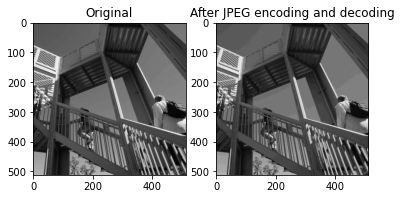

In [11]:
X = misc.ascent()
Z = JPEG_Encoder.encode(X)
Y = JPEG_Decoder.decode(Z)

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(Y, cmap=plt.cm.gray)
plt.title('After JPEG encoding and decoding')
plt.show()

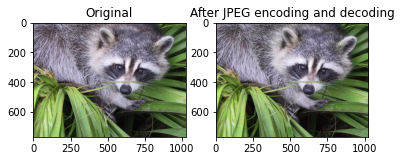

8.369442462921143


In [12]:
import time

start = time.time()

X = misc.face()
Z = JPEG_Encoder.encode(X)
Y = JPEG_Decoder.decode(Z)

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(Y, cmap=plt.cm.gray)
plt.title('After JPEG encoding and decoding')
plt.show()

end = time.time()
print(end - start)

In [14]:
# Exercitiul 3

In [15]:
def get_mse(X1, X2):
    return np.mean((X1.flatten() - X2.flatten()) ** 2)

def get_mse_on_image(X, compression_factor = 0):
    Z = JPEG_Encoder.encode(X, compression_factor)
    Y = JPEG_Decoder.decode(Z)
    return get_mse(X, Y)

def compress_to_mse(X, max_mse):
    min_mse = get_mse_on_image(X)

    if max_mse < min_mse:
        print("This error is below the minimum achievable error")
        return -1

    best_c = 0

    for c in range(1, 2 * block_size):
        mse = get_mse_on_image(X, c)
        if mse <= max_mse:
            best_c = c
        else:
            return best_c

    return best_c

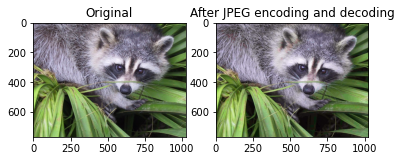

Compression factor: 8, MSE: 14.606947580973307


In [16]:
X = misc.face()
max_mse = 20
c = compress_to_mse(X, max_mse)

if c < 0:
    print("Bad mse desired! Please modify the max mse!")
else:
    Z = JPEG_Encoder.encode(X, c)
    Y = JPEG_Decoder.decode(Z)
    plt.subplot(121).imshow(X, cmap=plt.cm.gray)
    plt.title('Original')
    plt.subplot(122).imshow(Y, cmap=plt.cm.gray)
    plt.title('After JPEG encoding and decoding')
    plt.show()
    print(f"Compression factor: {c}, MSE: {get_mse(X, Y)}")

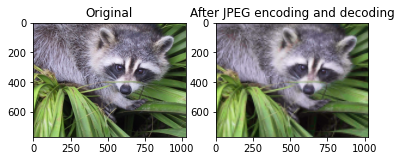

Compression factor: 14, MSE: 71.11010445488824


In [17]:
# WARNING: this will take ~4 min
X = misc.face()
max_mse = 80
c = compress_to_mse(X, max_mse)

if c < 0:
    print("Bad mse desired! Please modify the max mse!")
else:
    Z = JPEG_Encoder.encode(X, c)
    Y = JPEG_Decoder.decode(Z)
    plt.subplot(121).imshow(X, cmap=plt.cm.gray)
    plt.title('Original')
    plt.subplot(122).imshow(Y, cmap=plt.cm.gray)
    plt.title('After JPEG encoding and decoding')
    plt.show()
    print(f"Compression factor: {c}, MSE: {get_mse(X, Y)}")

In [ ]:
# Exercitiul 4

In [32]:
cap = cv2.VideoCapture("beach_4.mp4")

if not cap.isOpened():
    print("Cannot open the video file")

frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out_file = cv2.VideoWriter("beach_compressed.mp4", fourcc, 20.0, (frame_width, frame_height), True)

c = 12

In [33]:
frames = []
compressed_frames = []

while True:
    ret, frame = cap.read()

    if not ret:
        print("Error reading the frame or end of video")
        break

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame)


Error reading the frame or end of video


In [34]:
# WARNING: this will take a while (~25 min)
for idx, frame in enumerate(frames):
    print(f"Frame {idx + 1}/{frame_count}")
    
    Z = JPEG_Encoder.encode(frame, c)
    compressed_frame = JPEG_Decoder.decode(Z)
    
    compressed_frames.append(compressed_frame)

Frame 0/122
Frame 1/122
Frame 2/122
Frame 3/122
Frame 4/122
Frame 5/122
Frame 6/122
Frame 7/122
Frame 8/122
Frame 9/122
Frame 10/122
Frame 11/122
Frame 12/122
Frame 13/122
Frame 14/122
Frame 15/122
Frame 16/122
Frame 17/122
Frame 18/122
Frame 19/122
Frame 20/122
Frame 21/122
Frame 22/122
Frame 23/122
Frame 24/122
Frame 25/122
Frame 26/122
Frame 27/122
Frame 28/122
Frame 29/122
Frame 30/122
Frame 31/122
Frame 32/122
Frame 33/122
Frame 34/122
Frame 35/122
Frame 36/122
Frame 37/122
Frame 38/122
Frame 39/122
Frame 40/122
Frame 41/122
Frame 42/122
Frame 43/122
Frame 44/122
Frame 45/122
Frame 46/122
Frame 47/122
Frame 48/122
Frame 49/122
Frame 50/122
Frame 51/122
Frame 52/122
Frame 53/122
Frame 54/122
Frame 55/122
Frame 56/122
Frame 57/122
Frame 58/122
Frame 59/122
Frame 60/122
Frame 61/122
Frame 62/122
Frame 63/122
Frame 64/122
Frame 65/122
Frame 66/122
Frame 67/122
Frame 68/122
Frame 69/122
Frame 70/122
Frame 71/122
Frame 72/122
Frame 73/122
Frame 74/122
Frame 75/122
Frame 76/122
Frame 77/

In [35]:
for frame in compressed_frames:
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    out_file.write(frame)

cap.release()
out_file.release()

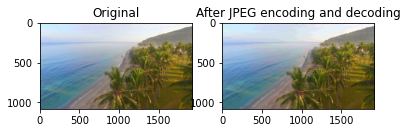

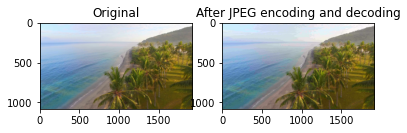

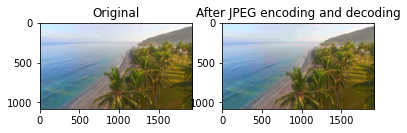

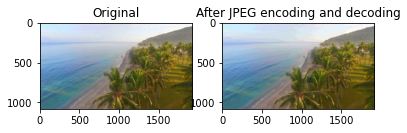

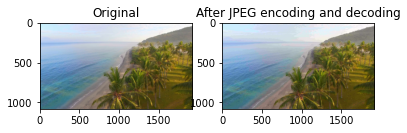

In [36]:
for frame, compr_frame in zip(frames[-5:], compressed_frames[-5:]):
    plt.subplot(121).imshow(frame, cmap=plt.cm.gray)
    plt.title('Original')
    plt.subplot(122).imshow(compr_frame, cmap=plt.cm.gray)
    plt.title('After JPEG encoding and decoding')
    plt.show()